## 1. Import the Libraries

In [1]:
# Import Numpy, Pandas, Matplotlib, Seaborn and Pydot libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pydot

## 2. Load the Data

In [2]:
# Load the dataset (read from .csv file and set it to a Pandas DataFrame)
kyphosis_df = pd.read_csv("Kyphosis_Data.csv")

## 3. Exploratory Data Analysis

- Study the dataset and describe the columns to understand the data
- Aim is to gain intuition about the data, good understanding of the dataset, some notes for Data Cleaning, and possibly some ideas for Feature Engineering

### 3.1 Check out the Data

#### Insights we could draw from the data:
1. To get to know the data
2. Answer a set of basic questions about the dataset:	
    - How many observations do we have?
	- How many features?
        - Which features are available in the dataset?
	- What are the data types of the features?
        - Which features are numerical?
        - Which features are categorical?
        - Which features are mixed data types?
	- Do we have a target variable (label)?
    - What is the distribution of numerical feature values across the samples?

In [3]:
# Display the few top rows of a DataFrame
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
# Shape of the dataset
kyphosis_df.shape

(81, 4)

In [5]:
# List of the column names
kyphosis_df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [6]:
# List of all numerical columns
kyphosis_df.select_dtypes(include='number').columns

Index(['Age', 'Number', 'Start'], dtype='object')

In [7]:
# List of all non-numerical columns
kyphosis_df.select_dtypes(exclude='number').columns

Index(['Kyphosis'], dtype='object')

In [8]:
# Data type of each column in a DataFrame
kyphosis_df.dtypes

Kyphosis    object
Age          int64
Number       int64
Start        int64
dtype: object

In [9]:
# Find out how many entries (rows and columns) there are, what type of objects are in the DataFrame (to observe if they have the correct type) etc.
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [10]:
# Summarize the data to see the distribution of data (Statistical information of numerical columns)
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [11]:
# Summarize the data to see the distribution of data (Statistical information of non-numerical columns)
kyphosis_df.describe(exclude='number')

,Kyphosis
count,81
unique,2
top,absent
freq,64


#### Conclusion:
- The dataset contains 81 rows and 4 columns
    - **Number of observations**: 81
    - **Number of attributes**: 3 predictor variables and 1 target variable
        - **Predictor variables (features)** are: 'Age', 'Number', 'Start'
        - **Target variable (label)** is: 'Kyphosis'
- Types of the data contained within columns are int64 (3 columns) and object (1 column)
    - **Numerical variables (features)** are 'Age', 'Number', 'Start'
    - **Non-numerical variables (features)** is 'Kyphosis'
- Data variables types:
    - **Numerical** (Continous or Discrete) are: 'Age', 'Number', 'Start'
    - **Categorical** (Nominal or Ordinal) is: 'Kyphosis'
- No missing values in the dataset
- So far, there are no feature(s) that is/are of no significance and cannot provide any insight into the dataset

In [12]:
# Generate descriptive statistics of the column
kyphosis_df['Kyphosis'].describe()

count         81
unique         2
top       absent
freq          64
Name: Kyphosis, dtype: object

In [13]:
# Check the number of unique values in the column
kyphosis_df['Kyphosis'].nunique()

2

In [14]:
# Check the unique values and counts of unique values
kyphosis_df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [15]:
# Status counts as percentages
kyphosis_df['Kyphosis'].value_counts(normalize=True, dropna=False)

absent     0.790123
present    0.209877
Name: Kyphosis, dtype: float64

#### Conclusion:
- Target variable (label) is 'Kyphosis' column, it has 2 unique values (binary format) (class 'absent' and class 'present') and its data type is object
- The target variable (label) is categorical, which means that predicting of the target variable (label) is a **Classification problem**
- **Class distribution** (Number of observations (rows) that belong to each class (category)):
    - class 'absent': 64 (79%)
    - class 'present': 17 (21%)
- Each class does not have a same number of observations (79% vs. 21%) (imbalanced class distribution)

### 3.2 Data Visualizations

- Overall goal is **to visualize the data** and to get understanding of **which features are important** for analysis 
- **Types of plots for visualization**:
    - **Univariate plots**
        - plots of each **individual feature**
        - to better **understand each feature**
        - use Count plot, Bar plot, Histogram, Dist plot, Box plot, Whisker plot etc.
    - **Multivariate plots**
        - plots of several **(multi) features**
        - to better **understand the relationships between features**
        - Scatter plot, Heatmap, Pair plot, Bar plot etc.
- In order to select the appropriate plots for visualization, first **understand the Data Variables type (Numerical or Categorical)**:
    - Plot Categorical Distributions
    - Plot Numerical Distributions
    - Plot Correlations
    - Plot Segmentations

#### Insights we could draw from the charts:
**1. Plot Categorical Distributions**
   - Use Bar plot, Count plot
   - What is the range where the categorical feature have a large number of observations?
   - Is there are any sparse classes (classes that have a very small number of observations)?
   - Making a note to combine or reassign some of the sparse classes

**2. Plot Numerical Distributions**
   - Use Grid of Histograms, Distplot
   - What is the range where the target label is most distributed? (Check the distribution of target variable)
   - Potential outliers that don't make sense
   - Distributions that are unexpected
   - Features that should be binary (i.e. "wannabe indicator variables")
   - Boundaries that don't make sense
   - Potential measurement errors

**3. Plot Correlations**
   - Use Scatterplot, Heatmap, Barplot
   - Observe the relationships between label and all numeric features		
   - Observe the relationships between numeric features and other numeric features		
   - Which features are strongly (positively or negatively) correlated with the target variable (label)?	
   - Are there interesting or unexpected strong correlations between other features? (check for multi-co-linearity)
   - Is there any feature that is perfect predictor of the target variable (label)?
   
**4. Plot Segmentations**
   - Use Box plot
   - Observe the relationships between categorical features and label (Distribution of label per categorical feature)
   - Observe the relationships between categorical features and numeric features (Distribution of numeric feature per categorical feature)
   - Median (middle vertical bar in the box)									
   - Min and Max

In [16]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

#### 3.2.1 Plot Categorical Distributions

- Few things to look out for and insights we could draw from the charts:
   - Use Bar plot, Count plot
   - What is the range where the categorical feature have a large number of observations?
   - Is there are any sparse classes (classes that have a very small number of observations)?
   - Making a note to combine or reassign some of the sparse classes

### 1. `Kyphosis` feature

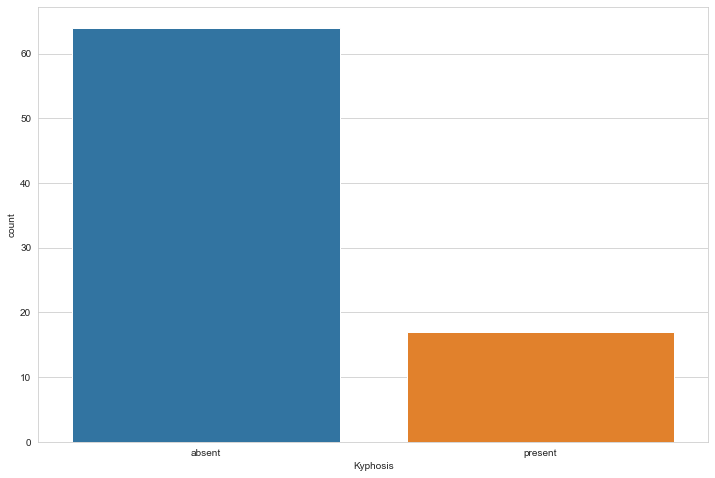

In [17]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of categorical data (target variable (label)) in each categorical bin
sns.countplot(x='Kyphosis', data=kyphosis_df)
plt.show()

In [18]:
# Check the unique values and counts of unique values
kyphosis_df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [19]:
# Status counts as percentages
kyphosis_df['Kyphosis'].value_counts(normalize=True, dropna=False)

absent     0.790123
present    0.209877
Name: Kyphosis, dtype: float64

#### Conclusion:
- 79% of the observations (64) are in class 'absent' and 21% of the observations (17) are in class 'present', so we have imbalanced classification problem:
    - class 'absent': 64 (79%)
    - class 'present': 17 (21%)
- Difference between the two classes is extreme, which means the model will do very well in terms of Accuracy, but Precision and Recall will be true metrics to evaluate the model

**Use *SMOTE: Synthetic Minority Over-sampling Technique* - technique that generates synthetic samples from the minority class**

#### 3.2.2 Plot Numerical Distributions

- Few things to look out for and insights we could draw from the charts:
   - Use Grid of Histograms, Distplot
   - What is the range where the target label is most distributed? (Check the distribution of target variable)
   - Potential outliers that don't make sense
   - Distributions that are unexpected
   - Features that should be binary (i.e. "wannabe indicator variables")
   - Boundaries that don't make sense
   - Potential measurement errors

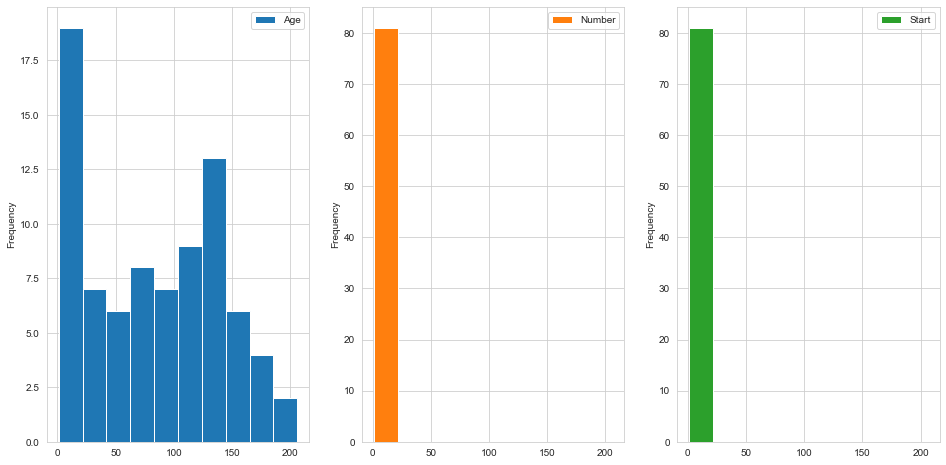

In [20]:
# Display (plot) and explore the distribution of a continious (numeric) feature
kyphosis_df[['Age', 'Number', 'Start']].plot(kind='hist', subplots=True, layout=(1,3), figsize=(16,8))
plt.show()

#### Conclusion:
- Looks like perhaps **two of the input features ('Number' and 'Start') don't have a Gaussian distribution**
- **Feature 'Age'** seems to have **right-skewed Gaussian distribution**

<Figure size 864x576 with 0 Axes>

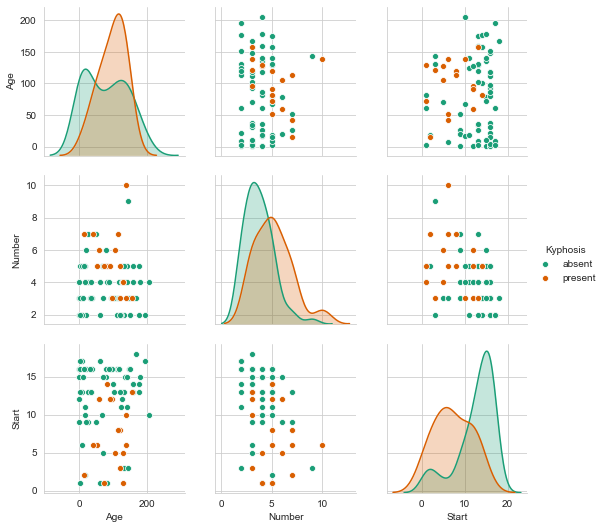

In [21]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of and the correlation between all numerical features
sns.pairplot(data=kyphosis_df, hue='Kyphosis', palette='Dark2')
plt.show()

#### Conclusion:
- No high correlation between features
- No feature that perform good separation of the classes ('absent' and 'present'), and this is an indication that all features can help in accurate predictions

### 1. `Age` feature

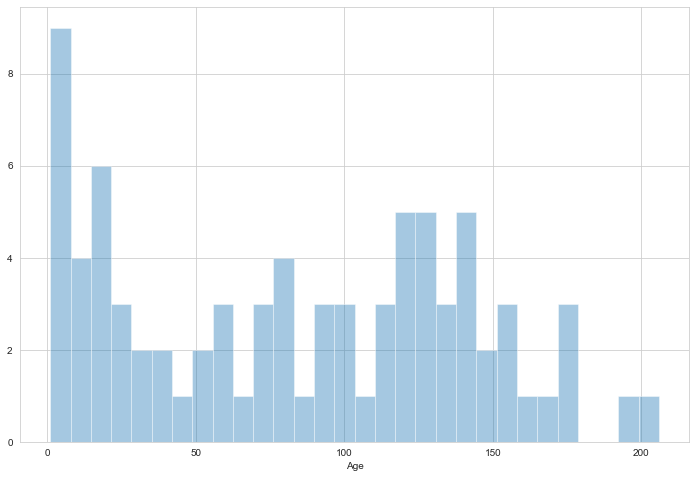

In [22]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of a continious (numeric) feature
sns.distplot(kyphosis_df['Age'].dropna(), kde=False, bins=30)
plt.show()

In [23]:
# Compute the arithmetic mean (average) value
kyphosis_df['Age'].mean()

83.65432098765432

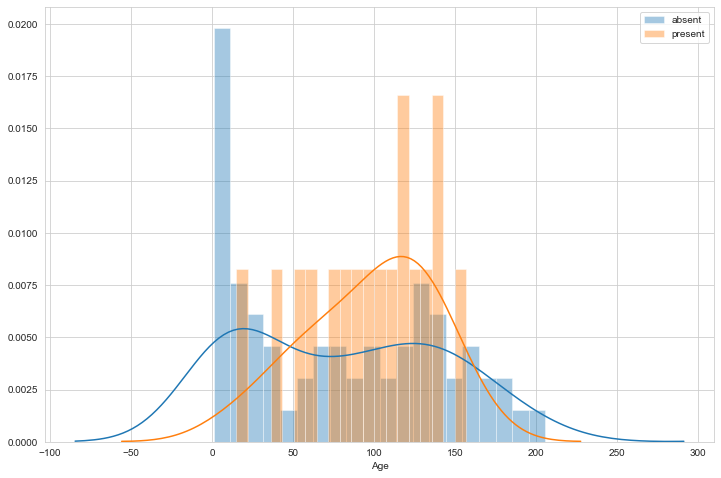

In [24]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of continious (numeric) features by class of categorical data (target variable (label))
for i in kyphosis_df['Kyphosis'].unique():
    sns.distplot(kyphosis_df['Age'][kyphosis_df['Kyphosis']==i], kde=True, label='{}'.format(i), bins=20)

plt.legend()
plt.show()

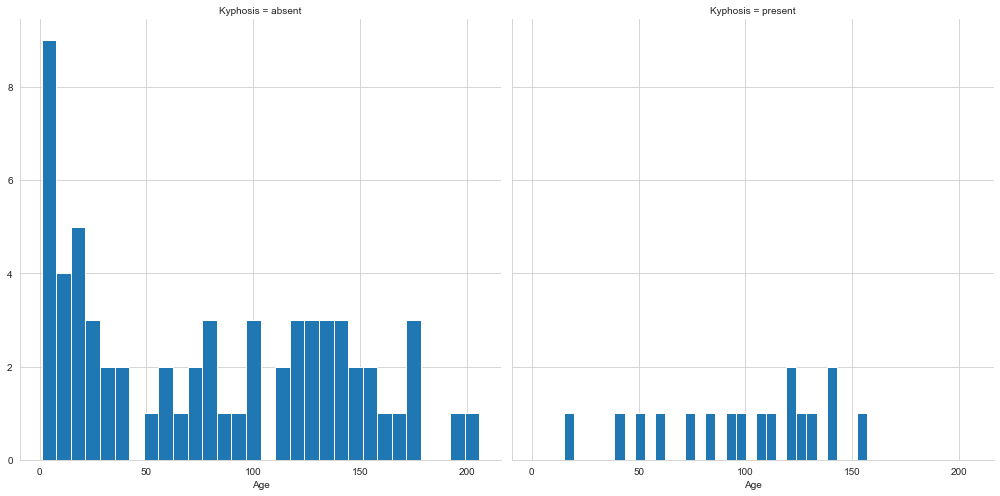

In [25]:
# Display (plot) and explore the conditional relationships between continious (numeric) features
# Initialize a 1x2 grid of facets
g = sns.FacetGrid(kyphosis_df, col='Kyphosis', height=7)

# Draw a univariate plot on each facet
g.map(plt.hist, 'Age', bins=30)

plt.show()

In [26]:
# Compute the arithmetic mean (average) of continious (numeric) features for class of categorical data (target variable (label))
kyphosis_df['Age'][kyphosis_df['Kyphosis']=='absent'].mean()

79.890625

In [27]:
# Compute the arithmetic mean (average) of continious (numeric) features for class of categorical data (target variable (label))
kyphosis_df['Age'][kyphosis_df['Kyphosis']=='present'].mean()

97.82352941176471

#### Conclusion:
- Feature 'Age' has right-skewed Gaussian distribution for class 'absent'
- For feature 'Age', mean (average) value for class 'absent' is smaller than mean (average) value for class 'present'

### 2. `Number` feature

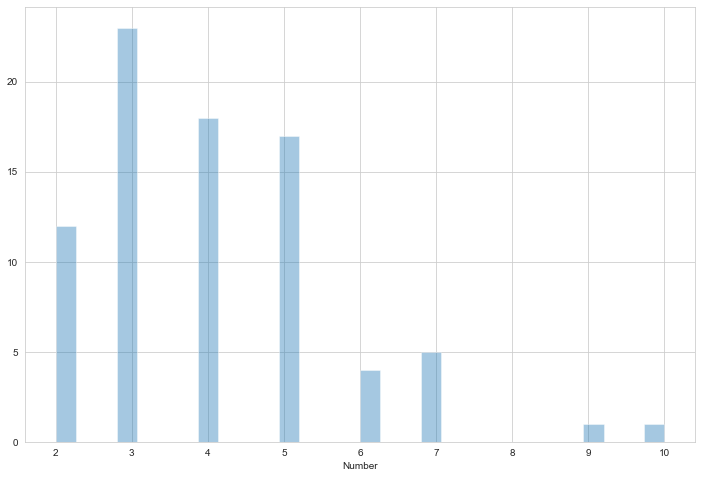

In [28]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of a continious (numeric) feature
sns.distplot(kyphosis_df['Number'].dropna(), kde=False, bins=30)
plt.show()

In [29]:
# Compute the arithmetic mean (average) value
kyphosis_df['Number'].mean()

4.049382716049383

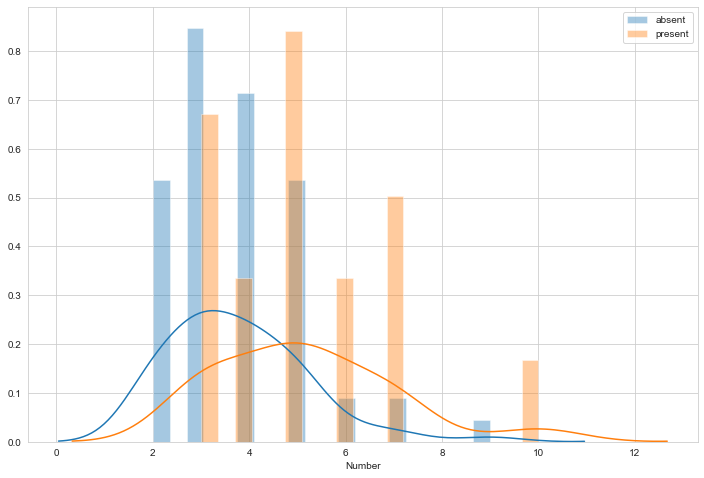

In [30]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of continious (numeric) features by class of categorical data (target variable (label))
for i in kyphosis_df['Kyphosis'].unique():
    sns.distplot(kyphosis_df['Number'][kyphosis_df['Kyphosis']==i], kde=True, label='{}'.format(i), bins=20)

plt.legend()
plt.show()

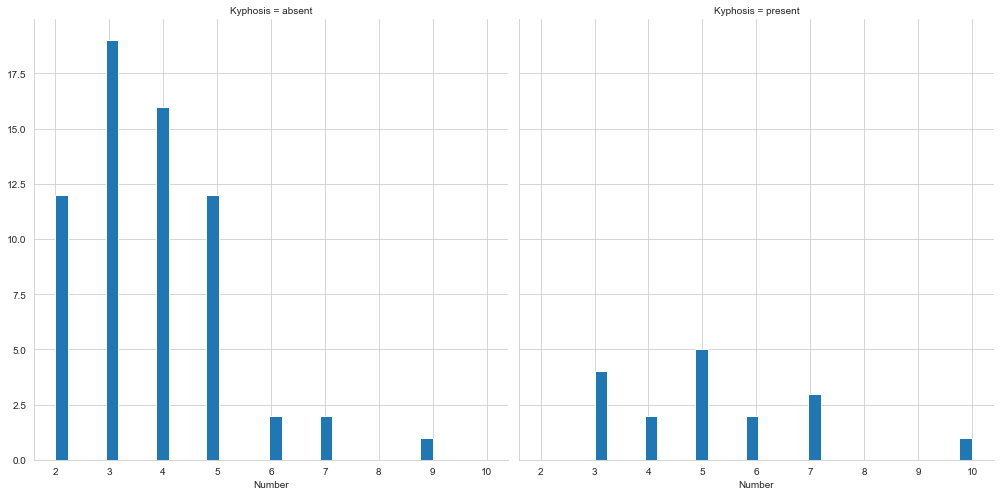

In [31]:
# Display (plot) and explore the conditional relationships between continious (numeric) features
# Initialize a 1x2 grid of facets
g = sns.FacetGrid(kyphosis_df, col='Kyphosis', height=7)

# Draw a univariate plot on each facet
g.map(plt.hist, 'Number', bins=30)

plt.show()

In [32]:
# Compute the arithmetic mean (average) of continious (numeric) features for class of categorical data (target variable (label))
kyphosis_df['Number'][kyphosis_df['Kyphosis']=='absent'].mean()

3.75

In [33]:
# Compute the arithmetic mean (average) of continious (numeric) features for class of categorical data (target variable (label))
kyphosis_df['Number'][kyphosis_df['Kyphosis']=='present'].mean()

5.176470588235294

#### Conclusion:
- Feature 'Number' has binomial distribution for both classes
- For feature 'Number', mean (average) value for class 'absent' is smaller than mean (average) value for class 'present'

### 3. `Start` feature

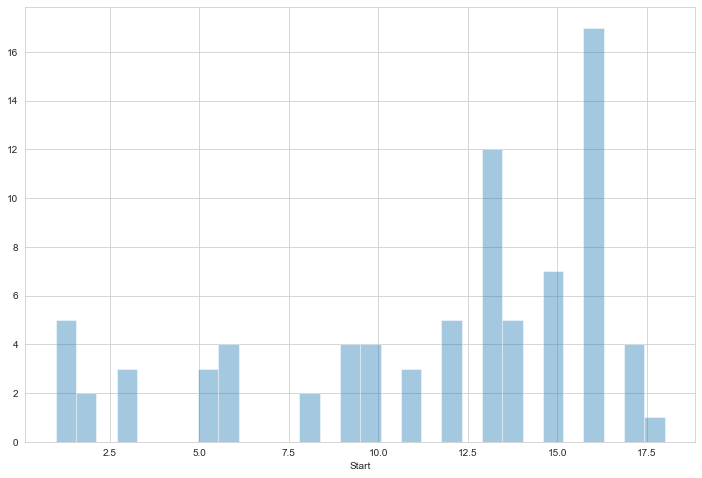

In [34]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of a continious (numeric) feature
sns.distplot(kyphosis_df['Start'].dropna(), kde=False, bins=30)
plt.show()

In [35]:
# Compute the arithmetic mean (average) value
kyphosis_df['Start'].mean()

11.493827160493828

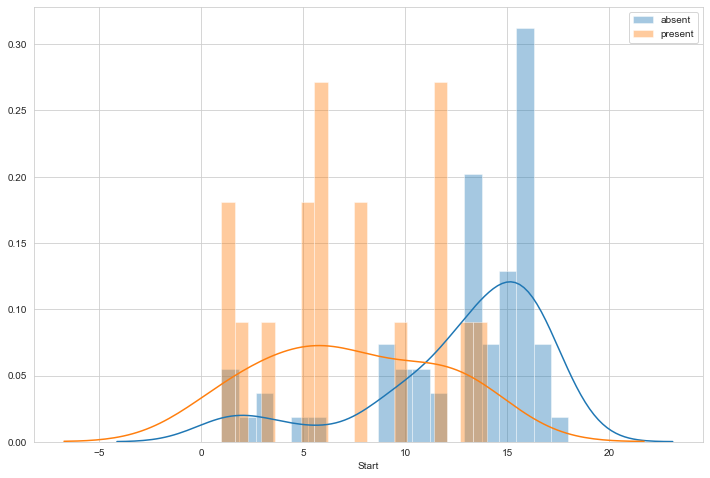

In [36]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of continious (numeric) features by class of categorical data (target variable (label))
for i in kyphosis_df['Kyphosis'].unique():
    sns.distplot(kyphosis_df['Start'][kyphosis_df['Kyphosis']==i], kde=True, label='{}'.format(i), bins=20)

plt.legend()
plt.show()

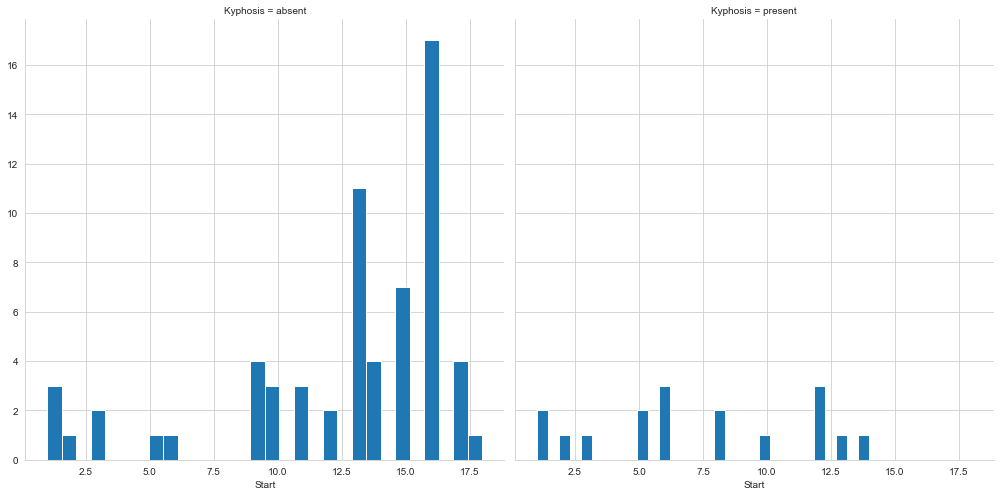

In [37]:
# Display (plot) and explore the conditional relationships between continious (numeric) features
# Initialize a 1x2 grid of facets
g = sns.FacetGrid(kyphosis_df, col='Kyphosis', height=7)

# Draw a univariate plot on each facet
g.map(plt.hist, 'Start', bins=30)

plt.show()

In [38]:
# Compute the arithmetic mean (average) of continious (numeric) features for class of categorical data (target variable (label))
kyphosis_df['Start'][kyphosis_df['Kyphosis']=='absent'].mean()

12.609375

In [39]:
# Compute the arithmetic mean (average) of continious (numeric) features for class of categorical data (target variable (label))
kyphosis_df['Start'][kyphosis_df['Kyphosis']=='present'].mean()

7.294117647058823

#### Conclusion:
- Feature 'Start' has binomial distribution for both classes
- For feature 'Start', mean (average) value for class 'absent' is higher than mean (average) value for class 'present'

#### 3.2.3 Plot Correlations

- Few things to look out for and insights we could draw from the charts:
   - Use Scatterplot, Heatmap, Barplot
   - Observe the relationships between label and all numeric features		
   - Observe the relationships between numeric features and other numeric features		
   - Which features are strongly (positively or negatively) correlated with the target variable (label)?	
   - Are there interesting or unexpected strong correlations between other features? (check for multi-co-linearity)
   - Is there any feature that is perfect predictor of the target variable (label)?

In [40]:
# Display data correlation (correlations between all numerical feature variables)
kyphosis_df.corr()

,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


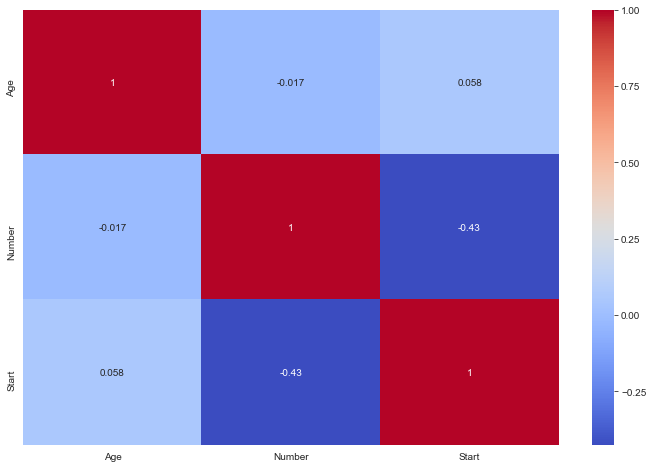

In [41]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore correlations between all continuous (numeric) feature variables through visualization
ax = sns.heatmap(data=kyphosis_df.corr(), annot=True, cmap='coolwarm')
plt.ylim(3, 0)

plt.show()

#### Conclusion:
- Resulting correlation table and Heatmap show the correlation score between all numerical feature variables
- Relatively high negative correlation value between 'Number' and 'Start' predictor variables
- There is no feature(s) that is/are perfect predictor(s) of the target variable (label)

#### 3.2.4 Plot Segmentations

- Few things to look out for and insights we could draw from the charts:
   - Use Box plot
   - Observe the relationships between categorical features and label (Distribution of label per categorical feature)
   - Observe the relationships between categorical features and numeric features (Distribution of numeric feature per categorical feature)
   - Median (middle vertical bar in the box)									
   - Min and Max

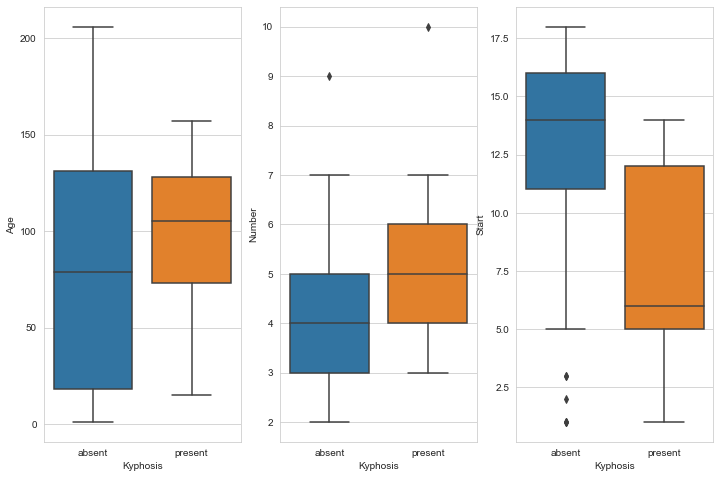

In [42]:
# Set up of the graphic area size
plt.figure(figsize=(12, 8))

# Display (plot) and explore the distributions of numeric features with respect to classes of categorical data (target variable (label))
plt.subplot(1,3,1)
sns.boxplot(x='Kyphosis', y='Age', data=kyphosis_df)
plt.subplot(1,3,2)
sns.boxplot(x='Kyphosis', y='Number', data=kyphosis_df)
plt.subplot(1,3,3)
sns.boxplot(x='Kyphosis', y='Start', data=kyphosis_df)

plt.show()

#### Conclusion:
- 'Age' values of class 'absent' is bigger and much spread-out than that of the other class
- 'Start' values of class 'present' is bigger and much spread-out than that of the other class
- Class 'absent' for feature 'Number' has lower value than class 'absent' for feature 'Start' on average

## 4. Data Preprocessing and Feature Engineering

#### Data Preprocessing and Feature Engineering by:
- check the relationship of the columns (features) with the target variable (label)
    - drop the columns (features) which are of no significance and cannot provide any insight into the dataset
- check the missing values by columns (features) and rows (observations)
    - drop the columns (features) and rows (observations) with missing values
    - fill in the missing values in columns (features)
    - drop the columns (features) which are of no significance and cannot provide any insight into the dataset
- convert to a Dummy variable feature using One-hot coding
- extracting the Date
- remove erroneous values
- redundant data
- nullify the impact of outliers
- etc.

### 4.1 Identify the variables

Look at the columns of the dataset which can act as:
- Predictor variables (features)
- Target variable (label)

In [43]:
# List of the column names
kyphosis_df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

#### Conclusion:
- **Predictor variables (features)** are: 'Age', 'Number', 'Start'
- **Target variable (label)** is: 'Kyphosis'

### 4.2 Dealing with Missing values

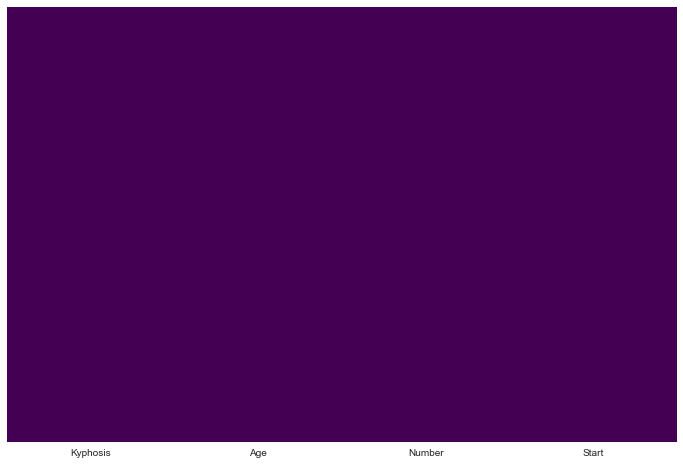

In [44]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) the missing values
sns.heatmap(data=kyphosis_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [45]:
# Total count of missing (null) values for each column and sort them in ascending order
kyphosis_df.isnull().sum().sort_values(ascending=False)

Start       0
Number      0
Age         0
Kyphosis    0
dtype: int64

In [46]:
# Total count of missing (null) values for each column in % of the total DataFrame and sort them in ascending order
kyphosis_df.isnull().mean().sort_values(ascending=False)*100

Start       0.0
Number      0.0
Age         0.0
Kyphosis    0.0
dtype: float64

#### Conclusion:
- No missing values in the dataset

### 4.3 Dealing with the Non-numerical features

In [47]:
# List all non-numerical columns
kyphosis_df.select_dtypes(exclude='number').columns

Index(['Kyphosis'], dtype='object')

#### Conclusion:
- Target value (label) is the only non-numerical variable (feature) in the dataset

## 5. Train and Test the Decision Tree Classifier model

### 5.1 Split the columns

- Separate features columns (X) from target variable (label) column (y)
- Split columns into:
    - X-array contains the features columns that we are going to train (only numerical columns)
    - y-array contains the target variable (label) column (what we try to predict)

In [48]:
# List of the column names
kyphosis_df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [49]:
# X-array
X = kyphosis_df.drop('Kyphosis',axis=1)
# or X = kyphosis_df[['Age', 'Number', 'Start']]

# y-array
y = kyphosis_df['Kyphosis']

### 5.2 Split the data into Training dataset and Testing dataset

- Training dataset is used to train out the model
- Testing dataset is used to test (evaluate) the model once it is trained
- Split the data into Training dataset and Testing dataset by Tuple unpacking
    - test_size is the percentage of dataset that we want to be allocated to the test size (0.3 = 30%)
    - random_state is specific set of random splits on data
- Split the Classified dataset (150 observations) into:
    - 70% Training data (105 observations)
    - 30% Testing data (45 observations)

In [50]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [51]:
# Split the data into Training dataset and Testing dataset by Tuple unpacking
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [52]:
# Shape of input Training dataset
X_train.shape

(56, 3)

In [53]:
# Shape of output Training dataset
y_train.shape

(56,)

In [54]:
# Shape of input Testing dataset
X_test.shape

(25, 3)

In [55]:
# Shape of output Testing dataset
y_test.shape

(25,)

### 5.3 Create the Decision Tree Classifier model

In [56]:
# Import the 'DecisionTreeClassifier' model from family 'tree' of Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

In [57]:
# Instantiate the DecisionTreeClassifier() model (Estimator) with parameters
# Create an instance of class DecisionTreeClassifier() model (DecisionTreeClassifier object)
dtc_model = DecisionTreeClassifier()

### 5.4 Train / fit the Decision Tree Classifier model

In [58]:
# Train / fit the Decision Tree Classifier model on Training dataset
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### 5.5 Predictions from the model on Testing data

- Predictions from the model are performed with observations that the model has never seen before
- Observations were previously stored in the Testing dataset (X_test)

In [59]:
# Get the predictions from the model based of the Testing dataset
predictions = dtc_model.predict(X_test)

# Check the predicted values
predictions

array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'present', 'absent',
       'absent'], dtype=object)

### 5.6 Evaluate the model on Testing data

- Provides the score for the Testing data
- Model predicts the class of the data and predicted class is matched with output Testing label to give the Accuracy

#### 5.6.1 Classification report 

- Summarize (evaluate) the performance of the classifier on Testing data
- Basic terminology used in Classification report:								
    - **precision** -> how many times the positive prediction was actually positive (TP / (TP+FP))
	- **recall** -> out of all positive points how many were predicted positive (TP / (TP+FN))
	- **f1-score** -> Harmonic mean of precision and recall ((precision * recall) / (precision + recall))
	- **support** -> quantity per class

In [60]:
# Import the Classification report from Scikit-Learn metrics
from sklearn.metrics import classification_report

In [61]:
# Evaluate the performance of the model on Testing dataset by using Classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



##### Conclusion:
- Accuracy of 56% is very bad and it is due to the imbalanced dataset
- True class we should be looking is the one that has lower representation (minority class) and it is class 'present'
- True notification whether or not the model is doing well is f1-score on class 'present' which is only 0.27
- It's apparent that the classifier is underperforming for class 'present' in terms of all metrics
- For class 'absent' the classifier is performing good, but not fantastic

#### 5.6.2 Confusion matrix

- Summary of prediction results on a Classification problem
- Use performance metrics to describe (evaluate) the performance of the Classification models on Testing data for which the true values are already known
- Basic terminology used in Confusion Matrix:								
    - **True Positive (TP)** -> reality is yes and predict is yes
	- **False Positive (FP)** -> reality is no and predict is yes (Type 1 error)
	- **False Negative (FN)** -> reality is yes and predict is no (Type 2 error)
	- **True Negative (TN)** -> reality is no and predict is no

            TP | FN
            ___ ___

            FP | TN

In [62]:
# Import the Confusion matrix from Scikit-Learn metrics
from sklearn.metrics import confusion_matrix

In [63]:
# Evaluate the performance of the model on Testing dataset by using Confusion matrix
print(confusion_matrix(y_test, predictions))

[[12  5]
 [ 6  2]]


##### Conclusion:
- TP = 12
- FN = 5
- FP = 6
- TN = 2

### 5.7 Feature Importance

In [64]:
# Get the Feature Importance scores
importance = dtc_model.feature_importances_

In [65]:
# Summarize the Feature Importance scores
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.46893
Feature: 1, Score: 0.21870
Feature: 2, Score: 0.31237


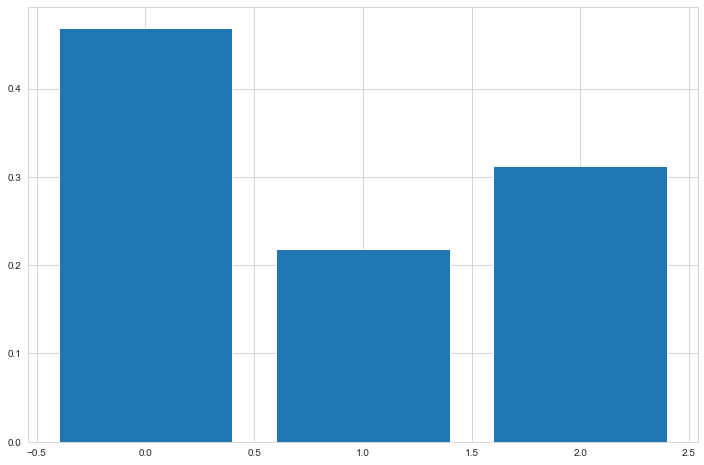

In [66]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Plot the Feature Importance scores
plt.bar([x for x in range(len(importance))], importance)

plt.show()

In [67]:
# Get the Feature Importance scores
f_i = dtc_model.feature_importances_

# Get the sorted Feature Importance scores
feature_importance = pd.DataFrame(f_i, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

# Check the sorted Feature Importance scores
feature_importance

,Feature Importance
Age,0.468925
Start,0.312372
Number,0.218703


##### Conclusion:
- The results suggest perhaps one of the three features as being important to prediction and it is feature 'Age'

### 5.8 Tree Visualization

In [68]:
# Import Image from IPython.display
# Import StringIO from sklearn.externals.six
# Import export_graphviz from sklearn.tree

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [69]:
# Get the features in the dataset
features = list(kyphosis_df.columns[1:])

# Check the features in the dataset
features

['Age', 'Number', 'Start']

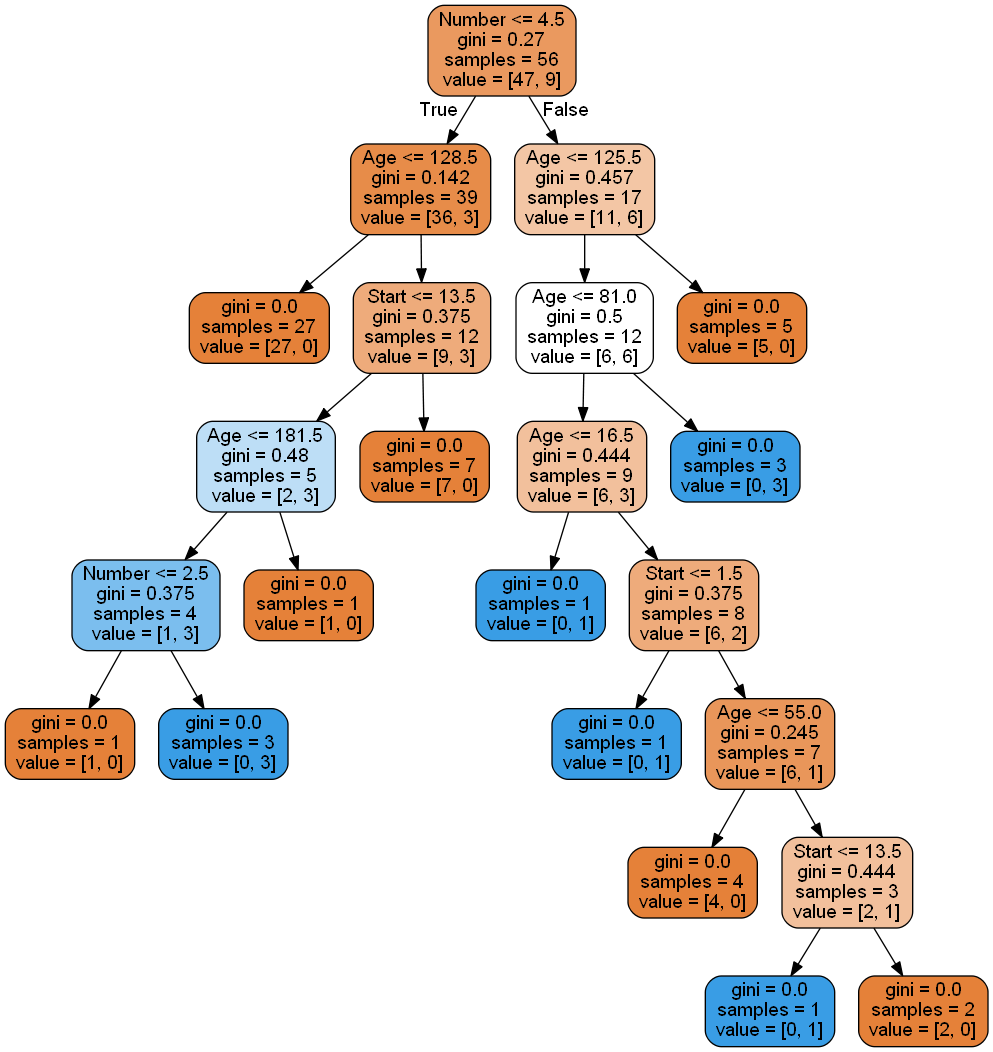

In [70]:
# Read and write strings buffer as files (also known as memory files)
dot_data = StringIO()

# Export a Decision Tree in DOT format
export_graphviz(dtc_model, out_file=dot_data, feature_names=features, filled=True, rounded=True)

# Load graph object as defined by data in DOT format
graph = pydot.graph_from_dot_data(dot_data.getvalue())

# Create an image of the graph object
Image(graph[0].create_png())

In [71]:
# Import tree from sklearn
from sklearn import tree

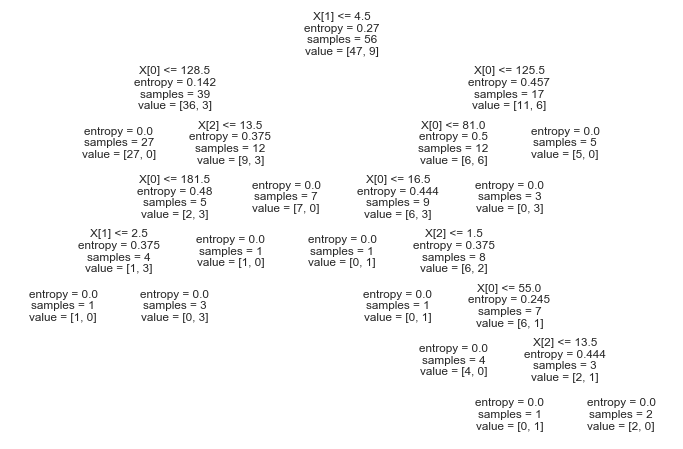

In [72]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and expore the tree
tree.plot_tree(dtc_model)

plt.show()

### 5.9 GridSearchCV

### GridSearchCV
- improve the model by **tuning / adjust the hyper-parameters of an estimator (model)**
- to **find the names and current values for all parameters for a given estimator** use `estimator().get_params()`
- Scikit-learn has **built-in functionality** called **GridSearchCV** (CV stands for Cross-Validation):
    - to find the right parameters to adjust
    - to create a 'grid' of those parameters
    - to try out all the possible combinations
- **GridSearchCV takes a Grid of parameters defined as a Dictionary** that should be tried and to train the model
    - keys - the parameters that should be tried in a model to train
    - values - the list of settings to be tested
- **GridSearchCV is a meta-estimator**, because it **takes an estimator** and **creates a new estimator**, that behaves exactly the same

### GridSearchCV for Decision Tree Classifier:
- **hyper-parameters for Decision Tree Classifier** are class_weight, criterion, max_depth, max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split, min_samples_leaf, min_samples_split, min_weight_fraction_leaf, presort, random_state, splitter
- **most common arguments** in GridSearchCV for Decision Tree Classifier:
    - **criterion** - The function to measure the quality of a split ('gini', 'entropy')
    - **splitter** - The strategy used to choose the split at each node ('best', 'random')
    - **max_depth** - The maximum depth of the tree (list of integer values)
- more information: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#### 5.9.1 Create the Grid of parameters

In [73]:
# Import the GridSearchCV built-in function from Scikit-Learn
from sklearn.model_selection import GridSearchCV

In [74]:
# Find the names and current values for all parameters for the Estimator
DecisionTreeClassifier().get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [75]:
# Create a Grid of parameters variable defined as Dictionary
param_grid = {'criterion': ['gini', 'entropy'], 
              'splitter': ['best', 'random'],
              'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

#### 5.9.2 Create the GridSearchCV model (Re-create the Decision Tree Classifier model)

In [76]:
# Create an instance of GridSearchCV() model (GridSearchCV object)
dtc_model_cv = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=3)

#### 5.9.3 Train / fit the GridSearchCV model (Re-train / Re-fit the Decision Tree Classifier model)

In [77]:
# Train / fit the Support Vector Machines model on Training dataset
dtc_model_cv.fit(X_train, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] criterion=gini, max_depth=4, splitter=best ......................
[CV]  criterion=gini, max_depth=4, splitter=best, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=4, splitter=best ......................
[CV]  criterion=gini, max_depth=4, splitter=best, score=0.526, total=   0.0s
[CV] criterion=gini, max_depth=4, splitter=best ......................
[CV]  criterion=gini, max_depth=4, splitter=best, score=0.722, total=   0.0s
[CV] criterion=gini, max_depth=4, splitter=random ....................
[CV]  criterion=gini, max_depth=4, splitter=random, score=0.737, total=   0.0s
[CV] criterion=gini, max_depth=4, splitter=random ....................
[CV]  criterion=gini, max_depth=4, splitter=random, score=0.579, total=   0.0s
[CV] criterion=gini, max_depth=4, splitter=random ....................
[CV]  criterion=gini, max_depth=4, splitter=random, score=0.889, total=   0.0s
[CV] criterion=gini, max_depth=5, splitter=b

[CV]  criterion=gini, max_depth=30, splitter=random, score=0.579, total=   0.0s
[CV] criterion=gini, max_depth=30, splitter=random ...................
[CV]  criterion=gini, max_depth=30, splitter=random, score=0.833, total=   0.0s
[CV] criterion=gini, max_depth=40, splitter=best .....................
[CV]  criterion=gini, max_depth=40, splitter=best, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=40, splitter=best .....................
[CV]  criterion=gini, max_depth=40, splitter=best, score=0.474, total=   0.0s
[CV] criterion=gini, max_depth=40, splitter=best .....................
[CV]  criterion=gini, max_depth=40, splitter=best, score=0.722, total=   0.0s
[CV] criterion=gini, max_depth=40, splitter=random ...................
[CV]  criterion=gini, max_depth=40, splitter=random, score=0.684, total=   0.0s
[CV] criterion=gini, max_depth=40, splitter=random ...................
[CV]  criterion=gini, max_depth=40, splitter=random, score=0.526, total=   0.0s
[CV] criterion=gini,

[CV] criterion=entropy, max_depth=8, splitter=random .................
[CV]  criterion=entropy, max_depth=8, splitter=random, score=0.737, total=   0.0s
[CV] criterion=entropy, max_depth=8, splitter=random .................
[CV]  criterion=entropy, max_depth=8, splitter=random, score=0.421, total=   0.0s
[CV] criterion=entropy, max_depth=8, splitter=random .................
[CV]  criterion=entropy, max_depth=8, splitter=random, score=0.833, total=   0.0s
[CV] criterion=entropy, max_depth=9, splitter=best ...................
[CV]  criterion=entropy, max_depth=9, splitter=best, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=9, splitter=best ...................
[CV]  criterion=entropy, max_depth=9, splitter=best, score=0.737, total=   0.0s
[CV] criterion=entropy, max_depth=9, splitter=best ...................
[CV]  criterion=entropy, max_depth=9, splitter=best, score=0.833, total=   0.0s
[CV] criterion=entropy, max_depth=9, splitter=random .................
[CV]  criterion=e

[CV]  criterion=entropy, max_depth=120, splitter=random, score=0.833, total=   0.0s
[CV] criterion=entropy, max_depth=150, splitter=best .................
[CV]  criterion=entropy, max_depth=150, splitter=best, score=0.737, total=   0.0s
[CV] criterion=entropy, max_depth=150, splitter=best .................
[CV]  criterion=entropy, max_depth=150, splitter=best, score=0.474, total=   0.0s
[CV] criterion=entropy, max_depth=150, splitter=best .................
[CV]  criterion=entropy, max_depth=150, splitter=best, score=0.833, total=   0.0s
[CV] criterion=entropy, max_depth=150, splitter=random ...............
[CV]  criterion=entropy, max_depth=150, splitter=random, score=0.684, total=   0.0s
[CV] criterion=entropy, max_depth=150, splitter=random ...............
[CV]  criterion=entropy, max_depth=150, splitter=random, score=0.368, total=   0.0s
[CV] criterion=entropy, max_depth=150, splitter=random ...............
[CV]  criterion=entropy, max_depth=150, splitter=random, score=0.778, total=

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    1.3s finished
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15,

In [78]:
# Get the combination of parameters (best parameter setting) that has the best score
print("Best parameters (tuned hyper-parameters): ", dtc_model_cv.best_params_)

Best parameters (tuned hyper-parameters):  {'criterion': 'entropy', 'max_depth': 40, 'splitter': 'best'}


In [79]:
# Get the best score
print("Best score: ", dtc_model_cv.best_score_)

Best score:  0.8035714285714286


In [80]:
# Get the best Estimator_
print("Best Estimator: ", dtc_model_cv.best_estimator_)

Best Estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


#### 5.9.4 Predictions from the GridSearchCV model (Re-predictions from the Decision Tree Classifier model) on Testing data

In [81]:
# Get the re-predictions from the model based of the Testing dataset
dtc_model_cv_predictions = dtc_model_cv.predict(X_test)

# Check the re-predicted values
dtc_model_cv_predictions

array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'present', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent'], dtype=object)

#### 5.9.5 Evaluate the GridSearchCV model (Re-evaluate the Decision Tree Classifier model) on Testing data

#### 1. Classification report 

In [82]:
# Re-evaluate the performance of the model on Testing dataset by using Classification report
print(classification_report(y_test, dtc_model_cv_predictions))

              precision    recall  f1-score   support

      absent       0.88      0.88      0.88        17
     present       0.75      0.75      0.75         8

    accuracy                           0.84        25
   macro avg       0.82      0.82      0.82        25
weighted avg       0.84      0.84      0.84        25



##### Conclusion:
- Accuracy increased from 56% (before GridSearchCV) to 84% (after GridSearchCV) and is very good
- All metrics for both classes increased significantly
- Since the dataset is imbalanced, true class we should be looking is the one that has lower representation (class 'present') and true notification whether or not the model is doing well is f1-score on class 'present' which is 0.75 and that is good
- Recall and f1-score metrics for class 'absent' are very good

#### 2. Confusion matrix

In [83]:
# Re-evaluate the performance of the model on Testing dataset by using Confusion matrix
print(confusion_matrix(y_test, dtc_model_cv_predictions))

[[15  2]
 [ 2  6]]


##### Conclusion:
- TP = 15
- FN = 2
- FP = 2
- TN = 6